In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gsppy.gsp import GSP

In [2]:
dataorig=pd.read_csv('datos_compras.csv')#Leemos el fichero excel
dataorig

,id_compra,item
0,1,citrus fruit
1,1,semi-finished bread
2,1,margarine
3,1,ready soups
4,2,tropical fruit
...,...,...
43362,9835,chicken
43363,9835,tropical fruit
43364,9835,other vegetables
43365,9835,vinegar


In [3]:
dataorig.id_compra.value_counts()

1217    32
2974    29
2939    29
9002    29
5611    28
        ..
334      1
6477     1
2319     1
270      1
4046     1
Name: id_compra, Length: 9835, dtype: int64

Como podemos ver en el dataset se nos muestra por separado los items que se compran en una misma compra, por ello los juntaremos.

In [4]:
#Agrupamos los datos segun la variable id compra dado que queremos juntar, las transaccionoes del id
groupdata=dataorig.groupby(['id_compra'])
#Especificamos el separador que queremos usar
separador=','
#Unimos con el separador indicado a todas las rows de la columna item.
groupdata=groupdata['item'].apply(separador.join)
groupdata

id_compra
1       citrus fruit,semi-finished bread,margarine,rea...
2                            tropical fruit,yogurt,coffee
3                                              whole milk
4              pip fruit,yogurt,cream cheese,meat spreads
5       other vegetables,whole milk,condensed milk,lon...
                              ...                        
9831    sausage,chicken,beef,hamburger meat,citrus fru...
9832                                    cooking chocolate
9833    chicken,citrus fruit,other vegetables,butter,y...
9834    semi-finished bread,bottled water,soda,bottled...
9835    chicken,tropical fruit,other vegetables,vinega...
Name: item, Length: 9835, dtype: object

In [5]:
type(groupdata)#Vemos que ahora se trata de una serie y no de un dataframe

pandas.core.series.Series

In [6]:
#Pasamos a dataframe
datagroup=groupdata.to_frame()
datagroup

,item
id_compra,
1,"citrus fruit,semi-finished bread,margarine,rea..."
2,"tropical fruit,yogurt,coffee"
3,whole milk
4,"pip fruit,yogurt,cream cheese,meat spreads"
5,"other vegetables,whole milk,condensed milk,lon..."
...,...
9831,"sausage,chicken,beef,hamburger meat,citrus fru..."
9832,cooking chocolate
9833,"chicken,citrus fruit,other vegetables,butter,y..."


In [7]:
datagroup.columns#Id compras se ha convertido en el index.

Index(['item'], dtype='object')

In [8]:
#Creamos una columna con el numero de la transaccion dado que ahora no se tiene.
datagroup['Numero transaccion']=datagroup.index
datagroup

,item,Numero transaccion
id_compra,,
1,"citrus fruit,semi-finished bread,margarine,rea...",1
2,"tropical fruit,yogurt,coffee",2
3,whole milk,3
4,"pip fruit,yogurt,cream cheese,meat spreads",4
5,"other vegetables,whole milk,condensed milk,lon...",5
...,...,...
9831,"sausage,chicken,beef,hamburger meat,citrus fru...",9831
9832,cooking chocolate,9832
9833,"chicken,citrus fruit,other vegetables,butter,y...",9833


In [9]:
#Reordenamoms las columnas 
data = datagroup[['Numero transaccion','item']]
data

,Numero transaccion,item
id_compra,,
1,1,"citrus fruit,semi-finished bread,margarine,rea..."
2,2,"tropical fruit,yogurt,coffee"
3,3,whole milk
4,4,"pip fruit,yogurt,cream cheese,meat spreads"
5,5,"other vegetables,whole milk,condensed milk,lon..."
...,...,...
9831,9831,"sausage,chicken,beef,hamburger meat,citrus fru..."
9832,9832,cooking chocolate
9833,9833,"chicken,citrus fruit,other vegetables,butter,y..."


In [10]:
data.isnull().sum()# missing values

Numero transaccion    0
item                  0
dtype: int64

# 1.Prueba al menos dos configuraciones de soporte. Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos. 

Haremos la configuracion de soporte para determinados productos que en este caso seran los mas comprados para asi mostrar los patrones que me han resultado curiosos.

In [11]:
dataorig.item.value_counts()#utilizamos el dataframe original dado que en este los items se encuentra por separado

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
sound storage medium        1
baby food                   1
Name: item, Length: 169, dtype: int64

In [12]:
type(data['item'])#Mostramos el tipo 

pandas.core.series.Series

In [13]:
type(data.values[0])#Mostramos el tipo 

numpy.ndarray

Dado que ahora los items estan combinados, buscamos las rows que contengan dicho elemento

Estos productos son 'whole milk', 'other vegetables', 'rolls/buns' y 'soda'

In [14]:
#Guardamos en un array los productos que queramos, en este caso, los mas comprados.
#array para los nombres
productos=['milk','vegetables','rolls','soda']
#array para las rows de los productos
productosdata=['milk','vegetables','rolls','soda']

In [15]:
#Iteramos para todos los productos y los guardamos en su variable.
for idx,var in enumerate(productos):
    print('EL PRODUCTO ES: ',var)
    #Buscamos dentro del dataframe las rows que contienen dicho elemento
    productosdata[idx]=np.array(data[data['item'].str.contains(var)])
    print(productosdata[idx])#imprimimos las rows que contienen dicho producto

EL PRODUCTO ES:  milk
[[3 'whole milk']
 [5 'other vegetables,whole milk,condensed milk,long life bakery product']
 [6 'whole milk,butter,yogurt,rice,abrasive cleaner']
 ...
 [9822
  'pip fruit,grapes,berries,other vegetables,whole milk,UHT-milk,rolls/buns,zwieback,bottled water,soda,red/blush wine,specialty bar']
 [9828
  'frankfurter,tropical fruit,other vegetables,whole milk,frozen meals,rolls/buns,detergent,napkins,newspapers']
 [9831
  'sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins']]
EL PRODUCTO ES:  vegetables
[[5 'other vegetables,whole milk,condensed milk,long life bakery product']
 [8
  'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)']
 [11
  'tropical fruit,other vegetables,white bread,bottled water,chocolate']
 ...
 [9831
  'sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whi

In [16]:
#Realizamos el GSP de las variables para un soporte de 0.01 y 0.02
#Creamos el array donde se guardaran los datos del GSP
#Escogemos GSP bajos dado que en el caso de escoger numeros altos como 0,1 o 0,2 no saca resultados
gsp1=[0,0,0,0]
gsp2=[0,0,0,0]
for i in range(0,len(productosdata)):
    print('EL GSP DE LA VARIABLE:',productos[i].upper())
    print('Soporte de: 0.01')
    gsp1[i] = GSP(productosdata[i]).search(0.01)
    print(str(gsp1[i]))
    print('Soporte de: 0.02')
    gsp2[i] = GSP(productosdata[i]).search(0.02)
    print(str(gsp2[i])+'\n')

EL GSP DE LA VARIABLE: MILK
Soporte de: 0.01
[{('whole milk',): 121}]
Soporte de: 0.02
[{('whole milk',): 121}]

EL GSP DE LA VARIABLE: VEGETABLES
Soporte de: 0.01
[{('other vegetables',): 62}]
Soporte de: 0.02
[{('other vegetables',): 62}]

EL GSP DE LA VARIABLE: ROLLS
Soporte de: 0.01
[{('rolls/buns',): 109, ('rolls/buns,soda',): 23}]
Soporte de: 0.02
[{('rolls/buns',): 109}]

EL GSP DE LA VARIABLE: SODA
Soporte de: 0.01
[{('pastry,soda',): 27, ('soda',): 156, ('rolls/buns,soda',): 23}]
Soporte de: 0.02
[{('soda',): 156}]



Viendo los resultados analizaremos los productos con los soportes de 0.01 para poder sacar alguna interpretacion.

In [17]:
#Resultados soporte 0,01
for i in range(0,len(gsp1)):
    print('PRODUCTO: ',productos[i].upper())
    print(gsp1[i])

PRODUCTO:  MILK
[{('whole milk',): 121}]
PRODUCTO:  VEGETABLES
[{('other vegetables',): 62}]
PRODUCTO:  ROLLS
[{('rolls/buns',): 109, ('rolls/buns,soda',): 23}]
PRODUCTO:  SODA
[{('pastry,soda',): 27, ('soda',): 156, ('rolls/buns,soda',): 23}]


Interpretacion:
1. Podemos ver que en el caso de la compra de la leche se compra solo dicho producto.
2. Ocurre de la misma forma con el caso de la variable 'other vegetables' que se compra unicamente dicho producto.
3. En el caso de 'rolls/buns' se compra unicamente dicho item en cambio tambien se compra con la siguiente variable , es decir, soda.
4. Por ultimo en el caso de 'soda' se compra de varias formas, o solo se compra dicho item o se compra con la variable 'rolls/buns' o se compra con 'pastry'.

Es curioso dado que las dos primeras variables, es decir, 'whole milk' y 'other vegetables' son los items mas comprados. Por ello se podria pensar que hubiera mas compras que superaran el soporte que las compras de las otras variables que hemos analizado y que como hemos visto se compran menos pero, sin embargo, es al reves.

# Utiliza al menos dos representaciones gráficas para representar los patrones secuenciales obtenidos e interpretar los datos.

In [18]:
type(gsp1[2][0])#Mostramos el tipo de lo que se quiere imprimir

dict

In [19]:
print(gsp1[2][0])

{('rolls/buns',): 109, ('rolls/buns,soda',): 23}


In [20]:
#Convertimos los resultados en dataframe para su visualizacion
milk=pd.DataFrame(gsp1[0])
vegetables=pd.DataFrame(gsp1[1])
buns=pd.DataFrame(gsp1[2])
soda=pd.DataFrame(gsp1[3])

In [21]:
milk#Muestra de los dataframes

,"(whole milk,)"
0,121


In [22]:
vegetables

,"(other vegetables,)"
0,62


In [23]:
buns

,"(rolls/buns,)","(rolls/buns,soda,)"
0,109,23


In [24]:
soda

,"(pastry,soda,)","(soda,)","(rolls/buns,soda,)"
0,27,156,23


In [25]:
#Guardamos los values de los productos en los que se han comprado solo ese item para realizar una comparacion.
milk=milk.values
milk=milk[0][0]

In [26]:
vegetables=vegetables.values
vegetables=vegetables[0][0]

In [27]:
buns=buns.values
buns=buns[0][0]

In [28]:
soda=soda.values
soda=soda[0][1]

In [29]:
#Creamos un dataframe para facilitar la visualizacion de los datos
#Creamos el dataframe con los datos sobre la cantidad de los items que se compran de forma independiente y como index el nombre de las variables.
dataframe = pd.DataFrame(columns=['variable'], data=[milk,vegetables,buns,soda], index= productos)
dataframe

,variable
milk,121
vegetables,62
rolls,109
soda,156


<AxesSubplot:>

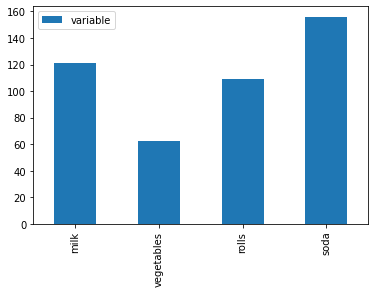

In [30]:
dataframe.plot(kind='bar')

         variable
count    4.000000
mean   112.000000
std     38.841558
min     62.000000
25%     97.250000
50%    115.000000
75%    129.750000
max    156.000000


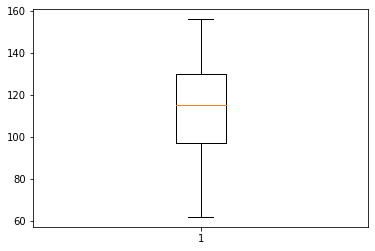

In [31]:
print(dataframe.describe())
plt.boxplot(dataframe)
plt.show()

Como podemos ver el caso de soda, se trata de un maximo.
En el caso de vegetables se trata del minimo, y se pude ver tanto rolls como milk se encuentran entre el maximo de soda y el minimo de vegetables.
Segun el describe de los datos y viendo el boxplot podemos ver que la media se encuentra en 112.

# REFERENCIAS
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html